In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
'''
CPLEX=MILP
docplexCPLEX CP=CP
TSSOS=SDP
'''
def file_combine(file_name,breakpoints):
    file_tmp=pd.DataFrame(columns=['size','runtime'])
    for bp in breakpoints:
        file_tmp=pd.concat([file_tmp,pd.read_csv(file_name+str(bp)+'.csv',header=0)],ignore_index=True)
    return file_tmp

def prep(df):
    df.columns = ['size','runtime']
    m=df.groupby('size').agg(np.mean)
    st=df.groupby('size').agg(np.std)

    x=m.index*(m.index-9)
    y=m['runtime'].tolist()
    ym=m['runtime']-st['runtime']
    yp=m['runtime']+st['runtime']
    
    return x,y,ym,yp

In [3]:
breakpoints=[(12,15),(16,16),(17,17),(18,18)]

#Sühr et al. 2019
time_inter0_doF1=file_combine('data/runtime_kdd_jupyterrange',breakpoints)
#time_inter0_doF1=pd.read_csv('data/runtime_kdd_jupyterrange(12, 15).csv',header=0)
time_inter0_cpF1=pd.read_csv('data/run_CPLEX_F1inter0_long.csv',header=None)
time_inter0_cpF2=pd.read_csv('data/run_CPLEX_F2inter0_long.csv',header=None)
time_sdpF2=pd.read_csv('data/runtime_SDP_long.csv',header=0)
time_inter0_sdpF2=time_sdpF2[['size','runInter0']]

#Intra 5 + Inter 3
time_inter3_doF1=file_combine('data/runtime_inter3_jupyterrange',breakpoints)
#time_inter3_doF1=pd.read_csv('data/runtime_inter3_jupyterrange(12, 15).csv',header=0)
time_inter3_cpF1=pd.read_csv('data/run_CPLEX_F1inter3_long.csv',header=None)
time_inter3_cpF2=pd.read_csv('data/run_CPLEX_F2inter3_long.csv',header=None)
time_inter3_sdpF2=time_sdpF2[['size','runInter3']]

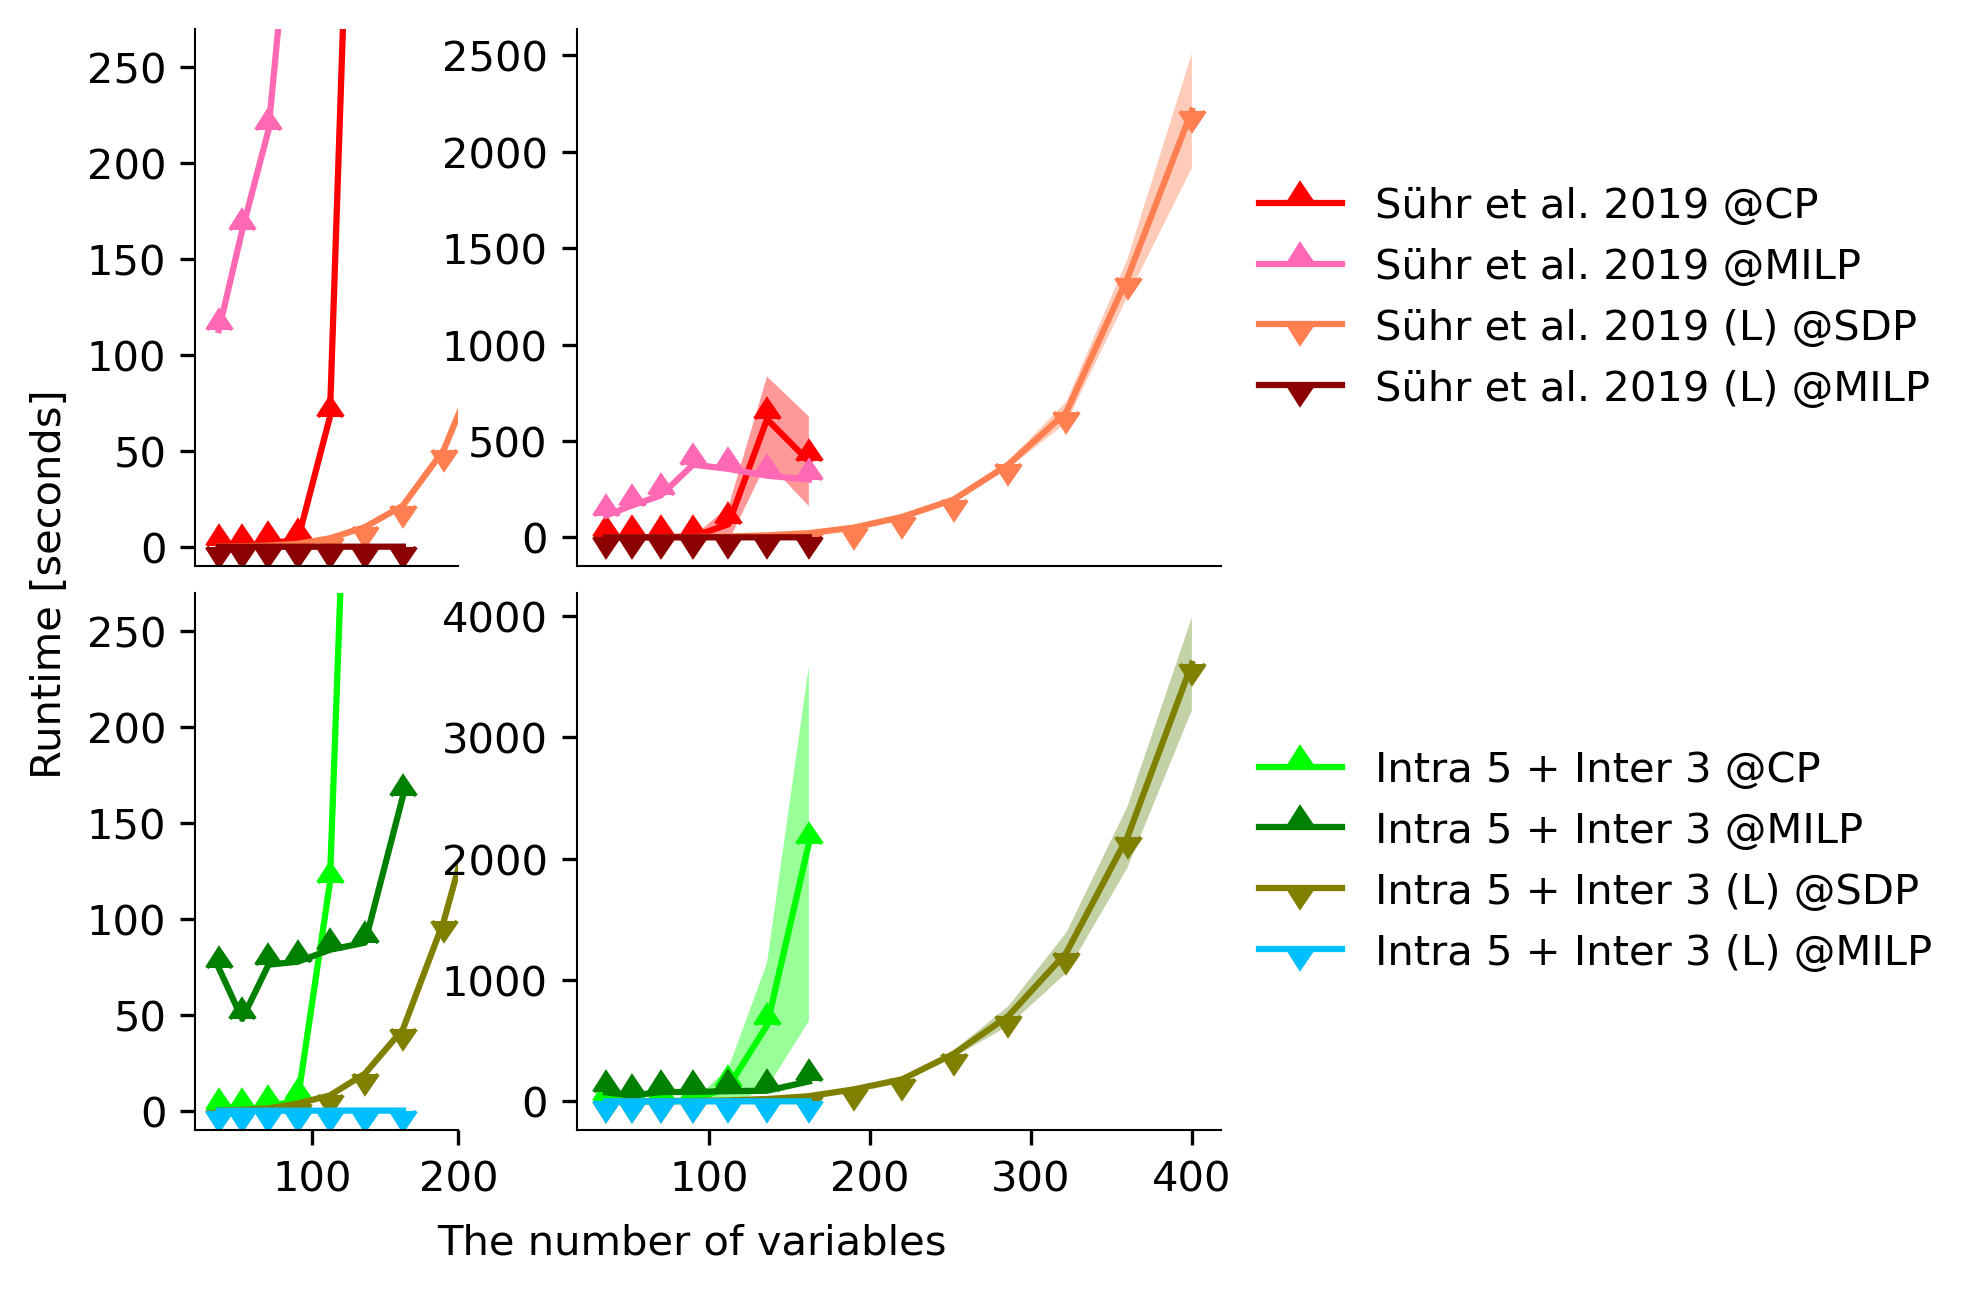

In [18]:
fig = plt.figure(figsize=(7.5/1.7,8.75/1.8), dpi=300)
plt.rcParams['axes.linewidth'] = 0.5
plt.rc('axes', labelsize=8) 
figsplit=(2,3)

ax = plt.subplot2grid(figsplit,(0,0),rowspan=1,colspan=1)

x,y,y1,y2=prep(time_inter0_doF1)
plt.plot(x,y, color='red',marker=10,label='Sühr et al. 2019 @CP')
#plt.fill_between(x,y1,y2,facecolor = "red",alpha=0.4)
x,y,y1,y2=prep(time_inter0_cpF1)
plt.plot(x,y, color='hotpink',marker=10, label='Sühr et al. 2019 @MILP')
#plt.fill_between(x,y1,y2,facecolor = "hotpink",alpha=0.4)
x,y,y1,y2=prep(time_inter0_sdpF2)
plt.plot(x,y, color='coral',marker=11, label='Sühr et al. 2019 (L) @SDP')
#plt.fill_between(x,y1,y2,facecolor = "coral",alpha=0.4)
x,y,y1,y2=prep(time_inter0_cpF2)
plt.plot(x,y, color='darkred',marker=11,label='Sühr et al. 2019 (L) @MILP')
#plt.fill_between(x,y1,y2,facecolor = "darkred",alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.xlim([20,200])
plt.ylim([-10,270])

ax = plt.subplot2grid(figsplit,(1,0),rowspan=1,colspan=1)

x,y,y1,y2=prep(time_inter3_doF1[['size','runtime']])
plt.plot(x,y, color='lime',marker=10, label='Intra 5 + Inter 3 @CP')
#plt.fill_between(x,y1,y2,facecolor = "lime",alpha=0.4)
x,y,y1,y2=prep(time_inter3_cpF1)
plt.plot(x,y, color='g',marker=10,label='Intra 5 + Inter 3 @MILP')
#plt.fill_between(x,y1,y2,facecolor = "green",alpha=0.4)
x,y,y1,y2=prep(time_inter3_sdpF2)
plt.plot(x,y, color='olive',marker=11, label='Intra 5 + Inter 3 (L) @SDP')
#plt.fill_between(x,y1,y2,facecolor = "olivedrab",alpha=0.4)
x,y,y1,y2=prep(time_inter3_cpF2)
plt.plot(x,y, color='deepskyblue',marker=11,label='Intra 5 + Inter 3 (L) @MILP')
#plt.fill_between(x,y1,y2,facecolor = "darkcyan",alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim([20,200])
plt.ylim([-10,270])

ax = plt.subplot2grid(figsplit,(0,1),rowspan=1,colspan=2)
#Sühr et al. 2019
x,y,y1,y2=prep(time_inter0_doF1)
plt.plot(x,y, color='red',marker=10,label='Sühr et al. 2019 @CP')
plt.fill_between(x,y1,y2,facecolor = "red",alpha=0.4)
x,y,y1,y2=prep(time_inter0_cpF1)
plt.plot(x,y, color='hotpink',marker=10, label='Sühr et al. 2019 @MILP')
plt.fill_between(x,y1,y2,facecolor = "hotpink",alpha=0.4)
x,y,y1,y2=prep(time_inter0_sdpF2)
plt.plot(x,y, color='coral',marker=11, label='Sühr et al. 2019 (L) @SDP')
plt.fill_between(x,y1,y2,facecolor = "coral",alpha=0.4)
x,y,y1,y2=prep(time_inter0_cpF2)
plt.plot(x,y, color='darkred',marker=11,label='Sühr et al. 2019 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "darkred",alpha=0.2)
#plt.savefig('runtime.pdf', bbox_inches = 'tight')
plt.legend(title='',loc='center left',frameon=False,bbox_to_anchor=(1.0, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])

ax = plt.subplot2grid(figsplit,(1,1),rowspan=1,colspan=2)

x,y,y1,y2=prep(time_inter3_doF1[['size','runtime']])
plt.plot(x,y, color='lime',marker=10, label='Intra 5 + Inter 3 @CP')
plt.fill_between(x,y1,y2,facecolor = "lime",alpha=0.4)
x,y,y1,y2=prep(time_inter3_cpF1)
plt.plot(x,y, color='g',marker=10,label='Intra 5 + Inter 3 @MILP')
plt.fill_between(x,y1,y2,facecolor = "green",alpha=0.4)
x,y,y1,y2=prep(time_inter3_sdpF2)
plt.plot(x,y, color='olive',marker=11, label='Intra 5 + Inter 3 (L) @SDP')
plt.fill_between(x,y1,y2,facecolor = "olivedrab",alpha=0.4)
x,y,y1,y2=prep(time_inter3_cpF2)
plt.plot(x,y, color='deepskyblue',marker=11,label='Intra 5 + Inter 3 (L) @MILP')
plt.fill_between(x,y1,y2,facecolor = "darkcyan",alpha=0.2)
plt.legend(title='',loc='center left',frameon=False,bbox_to_anchor=(1.0, 0.5))#, bbox_to_anchor=(0.0, 1.03)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45,hspace=0.05)
fig.text(0.5, 0.04, 'The number of variables', ha='center',fontsize='medium')
fig.text(0.0, 0.5, 'Runtime [seconds]', va='center', rotation='vertical',fontsize='medium')
plt.savefig('plots/Fig4.tiff',bbox_inches = 'tight',dpi=300)